In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load the dataset into python environment

data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(data.index)

RangeIndex(start=0, stop=891, step=1)


In [5]:
# Set the 'PassengerId' as the index column

data = data.set_index('PassengerId')

# Check the current index column

print(data.index)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)


In [6]:
#Check the basic details of the dataset

# View the first five rows of the DataFrame
print(data.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [7]:
# Display the summary information of the DataFrame

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [8]:
# Generate descriptive statistics of the DataFrame

print(data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
# Display the dimensions of the DataFrame

print(data.shape)

(891, 11)


In [10]:
#Fill in all the missing values present in all the columns in the dataset

# Find the number of null values in each column
null_counts = data.isnull().sum()

# Display the number of null values
print(null_counts)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [11]:
data = data.fillna(0)

In [12]:
# Find the number of null values in each column
null_counts = data.isnull().sum()

# Display the number of null values
print(null_counts)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


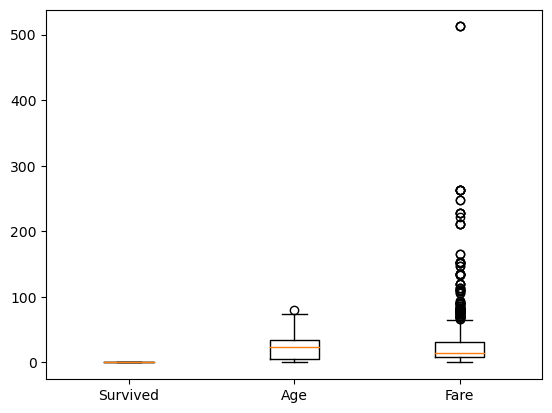

In [13]:
#Check and handle outliers in at least 3 columns in the dataset

# Assuming your DataFrame is named 'data'
data = data.fillna(0)

# Columns to analyze in the boxplot
columns_to_analyze = ['Survived', 'Age', 'Fare']

# Create Series objects for each column
column_series = [data[column] for column in columns_to_analyze]

# Visualize the data using box plots
fig, ax = plt.subplots()
ax.boxplot(column_series)

# Set x-axis labels
ax.set_xticklabels(columns_to_analyze)

# Show the box plots
plt.show()


In [14]:
print(data['Survived'].unique())

[0 1]


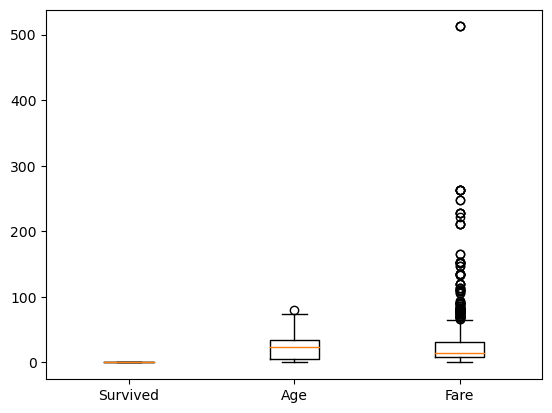

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
data = data.fillna(0)

# Columns to analyze in the boxplot
columns_to_analyze = ['Survived', 'Age', 'Fare']

# Create Series objects for each column
column_series = [data[column] for column in columns_to_analyze]

# Visualize the data using box plots
fig, ax = plt.subplots()
ax.boxplot(column_series)

# Set x-axis labels
ax.set_xticklabels(columns_to_analyze)

# Show the box plots
plt.show()


In [25]:
#Do min max scaling on the feature set (Take ‘Survived’ as target)

# Identify columns with string values
string_columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Convert mixed columns to string data type
data[string_columns] = data[string_columns].astype(str)

# Convert string columns to numerical representations using label encoding
label_encoder = LabelEncoder()

# Apply label encoding to the entire feature set
features_df_encoded = data.apply(label_encoder.fit_transform)

# Separate the target variable from the feature set
target_series = features_df_encoded['Survived']
features_df_encoded = features_df_encoded.drop('Survived', axis=1)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the feature set
scaler.fit(features_df_encoded)

# Transform the feature set using the scaler
scaled_features = scaler.transform(features_df_encoded)

# Convert the scaled features to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_df_encoded.columns)

# Print the scaled features DataFrame
print(scaled_features_df)

     Pclass      Name  Sex       Age     SibSp     Parch    Ticket      Fare  \
0       1.0  0.012360  1.0  0.329545  0.166667  0.000000  0.694118  0.072874   
1       0.0  0.114607  0.0  0.590909  0.166667  0.000000  0.811765  0.838057   
2       1.0  0.317978  0.0  0.397727  0.000000  0.000000  0.930882  0.165992   
3       0.0  0.216854  0.0  0.545455  0.166667  0.000000  0.638235  0.765182   
4       1.0  0.064045  1.0  0.545455  0.000000  0.000000  0.610294  0.174089   
..      ...       ...  ...       ...       ...       ...       ...       ...   
886     0.5  0.560674  1.0  0.409091  0.000000  0.000000  0.005882  0.344130   
887     0.0  0.256180  0.0  0.284091  0.000000  0.000000  0.067647  0.619433   
888     1.0  0.393258  0.0  0.000000  0.166667  0.333333  0.941176  0.530364   
889     0.0  0.887640  1.0  0.397727  0.000000  0.000000  0.969118  0.619433   
890     1.0  0.152809  1.0  0.488636  0.000000  0.000000  0.600000  0.121457   

        Cabin  Embarked  
0    0.000000